In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

pw = "Dollardollarbillyall"
db = "pokemondb"

In [2]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [3]:
#this is how you actually read data
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [4]:
connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database

MySQL Database connection successful


In [6]:
#order types by average total base stats

#fetchall method (used by read_query) returns a list of tuples
stats_data = read_query(connection, "SELECT type_1, AVG(total_points) FROM pokemon GROUP BY type_1 ORDER BY AVG(total_points) DESC;")

Plot after re-sizing plot: 


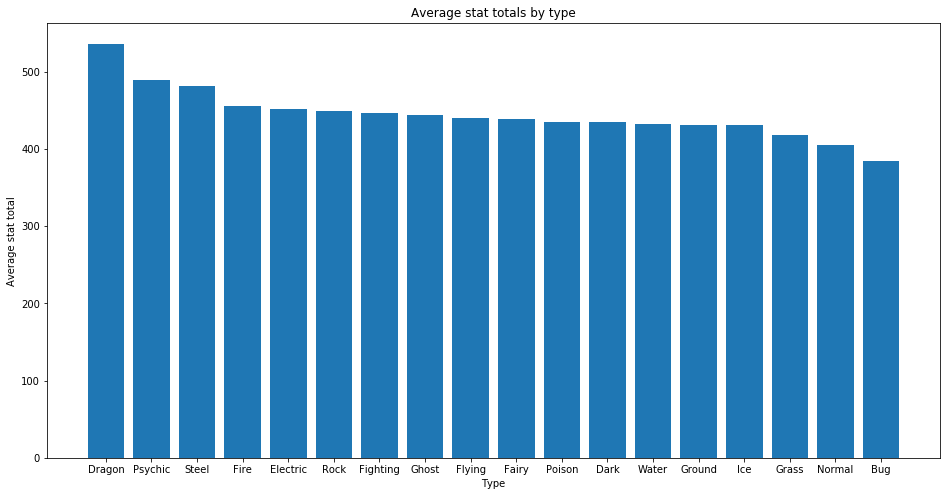

In [9]:
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)
  
print("Plot after re-sizing plot: ")
plt.bar(x_val,y_val,align='center')
plt.xlabel('Type')
plt.ylabel('Average stat total')
plt.title("Average stat totals by type")
plt.show()

### Now let's get number of pokemon based on primary type

In [10]:
q2 = """SELECT type_1, COUNT(name) FROM pokemon GROUP BY type_1 ORDER BY COUNT(name) DESC;

"""

#fetchall method (used by read_query) returns a list of tuples
amount_by_type_data = read_query(connection, q2)

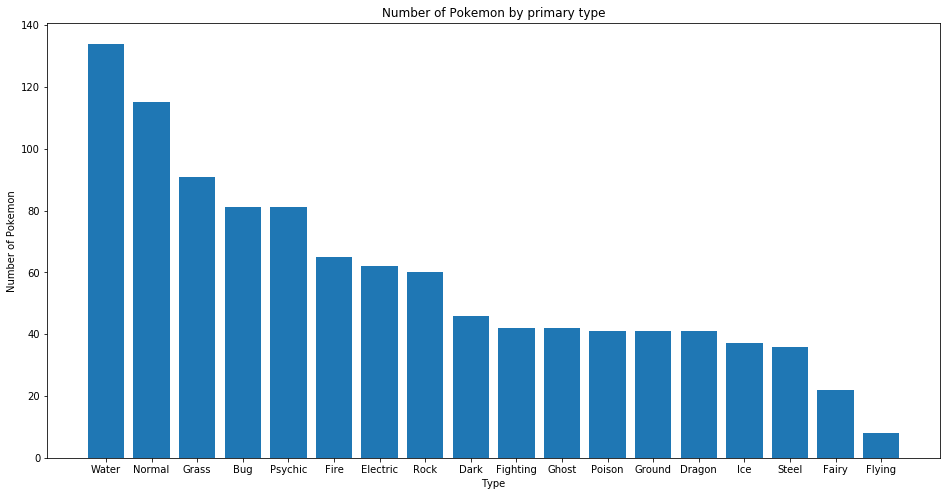

In [11]:
x_val2 = [x[0] for x in amount_by_type_data]
y_val2 = [x[1] for x in amount_by_type_data]

amount_graph = plt.figure()
amount_graph.set_figwidth(16)
amount_graph.set_figheight(8)
  
plt.bar(x_val2,y_val2,align='center')
plt.xlabel('Type')
plt.ylabel('Number of Pokemon')
plt.title("Number of Pokemon by primary type")
plt.show()

#### Or as a pie chart:

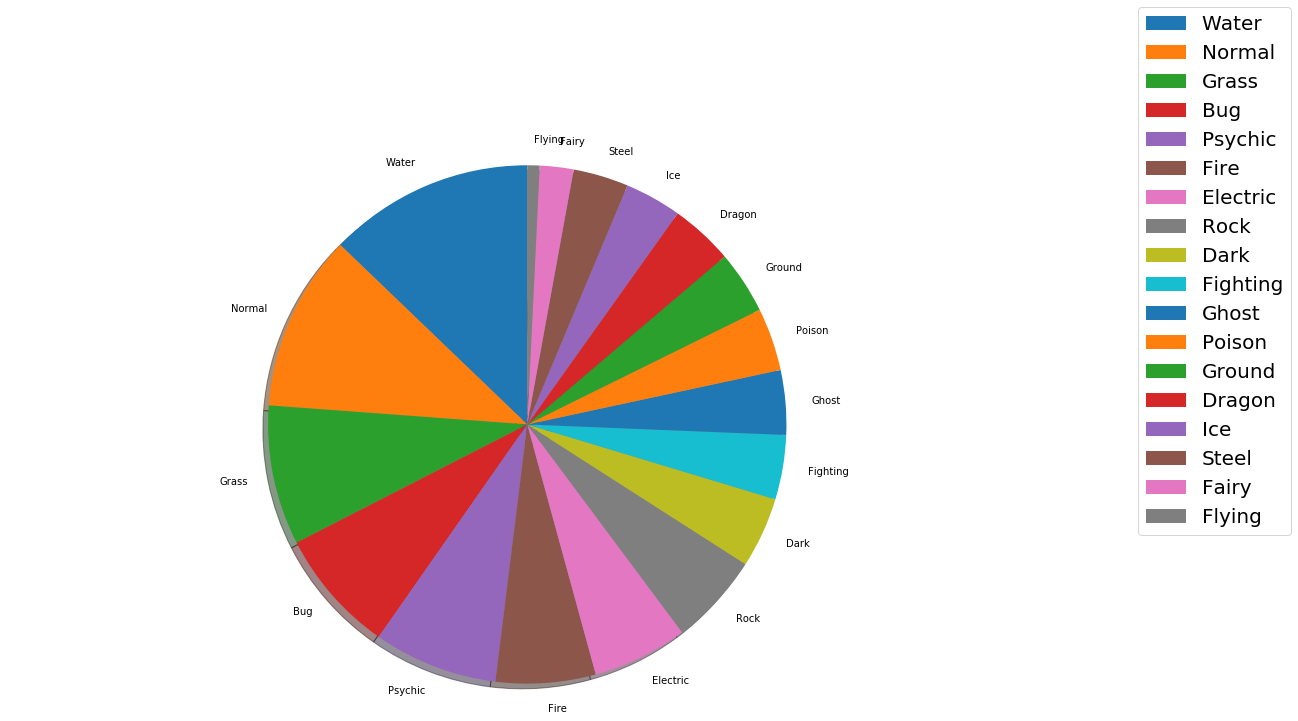

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [x[0] for x in amount_by_type_data]
sizes = [x[1] for x in amount_by_type_data]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(loc="upper right", fontsize=20, bbox_to_anchor=(1.25, 1.25))
fig1.set_size_inches(18.5, 10.5)

plt.show()

#### Let's get the number of legendary Pokemon per generation

In [13]:
q3 = """SELECT generation, COUNT(DISTINCT pokedex_number) FROM pokemon 
WHERE status = 'Legendary' OR status = 'Sub legendary' OR status = 'Mythical'
GROUP BY generation 
ORDER BY generation;

"""

#fetchall method (used by read_query) returns a list of tuples
legendary_amount_data = read_query(connection, q3)

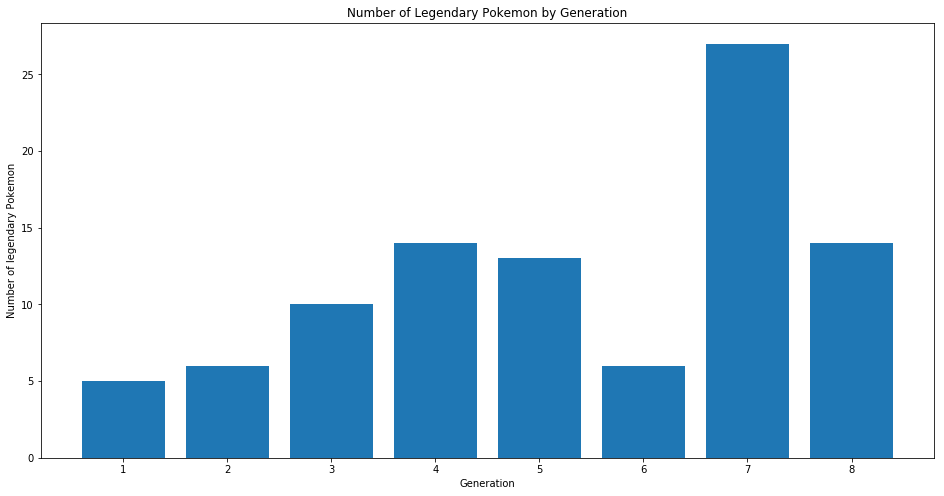

In [14]:
x_val3 = [x[0] for x in legendary_amount_data]
y_val3 = [x[1] for x in legendary_amount_data]

amount_graph = plt.figure()
amount_graph.set_figwidth(16)
amount_graph.set_figheight(8)
  
plt.bar(x_val3,y_val3,align='center')
plt.xlabel('Generation')
plt.ylabel('Number of legendary Pokemon')
plt.title("Number of Legendary Pokemon by Generation")
plt.show()

#### Plot the average attack stat of each type

In [16]:
q4 = """SELECT type_1, AVG(attack) FROM pokemon
GROUP BY type_1
ORDER BY AVG(ATTACK) DESC;

"""

#fetchall method (used by read_query) returns a list of tuples
attack_data = read_query(connection, q4)

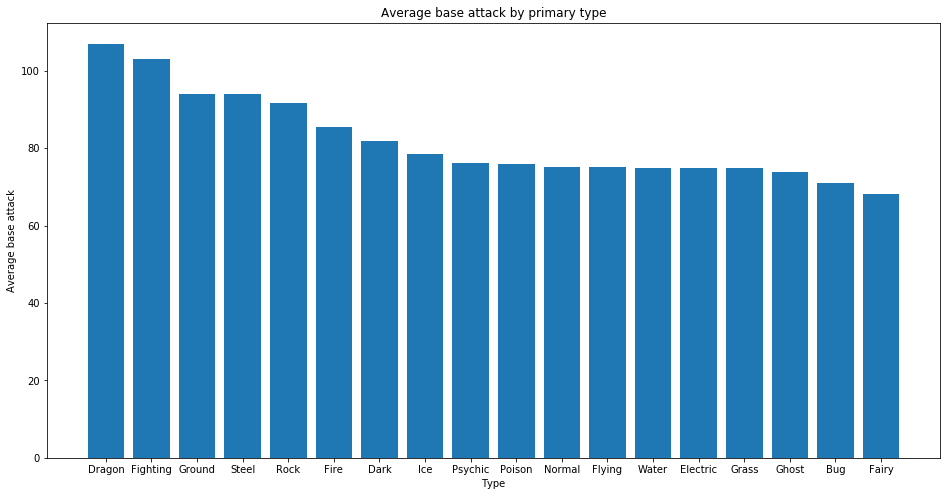

In [17]:
x_val4 = [x[0] for x in attack_data]
y_val4 = [x[1] for x in attack_data]

attack_graph = plt.figure()
attack_graph.set_figwidth(16)
attack_graph.set_figheight(8)
  
plt.bar(x_val4,y_val4,align='center')
plt.xlabel('Type')
plt.ylabel('Average base attack')
plt.title("Average base attack by primary type")
plt.show()

#### And the number of moves of each type

In [18]:
q5 = """SELECT type, COUNT(move) FROM move GROUP BY type ORDER BY COUNT(move) DESC;

"""

#fetchall method (used by read_query) returns a list of tuples
move_type_data = read_query(connection, q5)

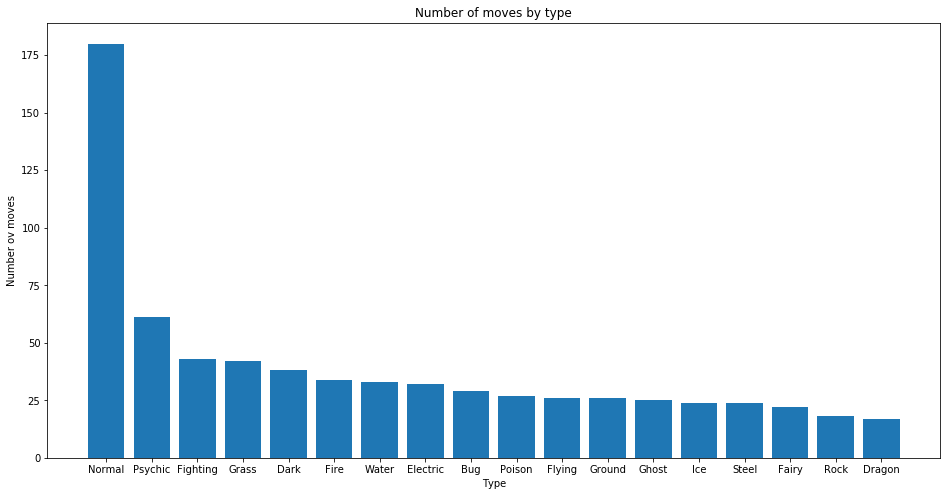

In [19]:
x_val5 = [x[0] for x in move_type_data]
y_val5 = [x[1] for x in move_type_data]

move_type_graph = plt.figure()
move_type_graph.set_figwidth(16)
move_type_graph.set_figheight(8)
  
plt.bar(x_val5,y_val5,align='center')
plt.xlabel('Type')
plt.ylabel('Number ov moves')
plt.title("Number of moves by type")
plt.show()

### Binning example

If I wanted split all Pokemon into 3 bins based on their base stat total, I could so with the following code. I will add a column to the dataframe that represents the bin each Pokemon is placed into. The bins will be low, medium, and high. I will first create a new dataframe by directly querying my database using the pandas method read_sql.

In [5]:
allpokemondf = pd.read_sql("SELECT * FROM pokemon;", connection)
allpokemondf.head()

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1,2,2,1,1,1,1,1,1,1
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1,2,2,1,1,1,1,1,1,1
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1,2,2,1,1,1,1,1,1,1
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1,2,2,1,1,1,1,1,1,1
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2,1,1,1,2,1,1,1,1,1


In [8]:
bins = np.linspace(min(allpokemondf["total_points"]), max(allpokemondf["total_points"]), 4)
group_names = ["Low", "Medium", "High"]

In [9]:
allpokemondf["stats_binned"] = pd.cut(allpokemondf["total_points"], bins, labels=group_names, include_lowest=True)

In [16]:
allpokemondf[["name", "total_points", "stats_binned"]]

,name,total_points,stats_binned
0,Bulbasaur,318,Low
1,Ivysaur,405,Low
2,Venusaur,525,Medium
3,Mega Venusaur,625,Medium
4,Charmander,309,Low
5,Charmeleon,405,Low
6,Charizard,534,Medium
7,Mega Charizard X,634,Medium
8,Mega Charizard Y,634,Medium
9,Squirtle,314,Low


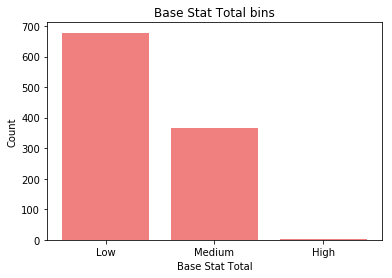

In [37]:
plt.bar(group_names, allpokemondf["stats_binned"].value_counts(), color="lightcoral")

# set x/y labels and plot title
plt.xlabel("Base Stat Total")
plt.ylabel("Count")
plt.title("Base Stat Total bins")
plt.show()

In [30]:
allpokemondf["stats_binned"].value_counts()

Low       678
Medium    366
High        1
Name: stats_binned, dtype: int64

From this histogram and the snapshot of the dataframe above, these bins show that most Pokemon have total base stats under 600 points and that no Pokemon (besides the max) are close to the maximum BST value.

# Let's get Pokemon with highest base stat total of each type and organize them by base stat total

### To do this, I have to join the Pokemon table to itself so that it only includes the highest stat total of each type. The SQL code is below.

In [9]:
q19 = """SELECT p1.name, p1.type_1, p1.type_2, p1.total_points
FROM pokemon p1
INNER JOIN
(
    SELECT type_1, MAX(total_points) AS max_stats
    FROM pokemon
    GROUP BY type_1
) p2
    ON p1.type_1 = p2.type_1 AND p1.total_points = p2.max_stats
ORDER BY p1.total_points DESC, type_1
;"""
    
base_stat_by_type_data = read_query(connection, q19)

#### Then I define a custom method to map colors to the Pandas datframe based on Pokemon types

In [11]:
# function that assigns color based on string value in dataframe
def color_type(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for positive
    strings, black otherwise.
    """
    if val == 'Fire':
        background_color = '#F08030'
    elif val == 'Water':
        background_color = 'Blue'
    elif val == 'Electric':
        background_color = 'Yellow'
    elif val == 'Poison':
        background_color = 'Purple'
    elif val == 'Fairy':
        background_color = 'Pink'
    elif val == 'Grass':
        background_color = 'Green'
    elif val == 'Ice':
        background_color = 'Lightblue'
    elif val == 'Steel':
        background_color = 'Grey'
    elif val == 'Ground':
        background_color = '#E0C068'
    elif val == 'Psychic':
        background_color = '#FF17D8'
    elif val == 'Dragon':
        background_color = '#7038F8'
    elif val == 'Fighting':
        background_color = '#C03028'
    elif val == 'Flying':
        background_color = '#A890F0'
    elif val == 'Ghost':
        background_color = '#705898'
    elif val == 'Bug':
        background_color = '#A8B820'
    elif val == 'Dark':
        background_color = '#705848'
    elif val == 'Normal':
        background_color = '#A8A878'
    elif val == 'Rock':
        background_color = '#B8A038'
    else:
        background_color = 'White'
    return 'background-color: %s' % background_color

#### The result looks nice and can be found below

In [14]:
# create DataFrame using data
base_stat_by_type_df = pd.DataFrame(base_stat_by_type_data, columns =['Pokemon', 'Type 1', 'Type 2', 'Base Stat Total'])
  
base_stat_by_type_df.style.applymap(color_type)\
                 .hide_index()\

Pokemon,Type 1,Type 2,Base Stat Total
Eternatus Eternamax,Poison,Dragon,1125
Mega Rayquaza,Dragon,Flying,780
Mega Mewtwo X,Psychic,Fighting,780
Mega Mewtwo Y,Psychic,None,780
Primal Groudon,Ground,Fire,770
Primal Kyogre,Water,None,770
Zacian Crowned Sword,Fairy,Steel,720
Zamazenta Crowned Shield,Fighting,Steel,720
Arceus,Normal,None,720
Mega Diancie,Rock,Fairy,700


## I can do more of this type of searching through the Pokemon table and organizing it into nice looking dataframes. If I wanted to find the highest base stat total by type EXCLUDING legendaries AND mega evolutions (a subset of Pokemon), I could do the following by modifying my initial self join

In [15]:
connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database

q21 = """SELECT p1.name, p1.type_1, p1.type_2, p1.total_points
FROM pokemon p1
INNER JOIN
(
    SELECT name, type_1, MAX(total_points) AS max_stats
    FROM pokemon
    WHERE status = 'Normal' AND name NOT LIKE 'Mega%'
    GROUP BY type_1
) p2
    ON p1.type_1 = p2.type_1 AND p1.total_points = p2.max_stats AND status = 'Normal' AND p1.name NOT LIKE 'Mega%'
    
WHERE p1.name NOT LIKE '%Mega%'
ORDER BY p1.total_points DESC, type_1
;"""
    
#fetchall method (used by read_query) returns a list of tuples
base_stat_non_legend_non_mega_data = read_query(connection, q21)

MySQL Database connection successful


In [16]:
# create DataFrame using data
base_stat_non_legend_non_mega_df = pd.DataFrame(base_stat_non_legend_non_mega_data, columns =['Pokemon', 'Type 1', 'Type 2', 'Base Stat Total'])
  
base_stat_non_legend_non_mega_df.style.applymap(color_type)\
                 .hide_index()\

Pokemon,Type 1,Type 2,Base Stat Total
Slaking,Normal,None,670
Ash-Greninja,Water,Dark,640
Hydreigon,Dark,Dragon,600
Dragonite,Dragon,Flying,600
Goodra,Dragon,None,600
Salamence,Dragon,Flying,600
Kommo-o,Dragon,Fighting,600
Dragapult,Dragon,Ghost,600
Garchomp,Dragon,Ground,600
Tyranitar,Rock,Dark,600


## Now let's switch to the move table and look through that. Let's find all moves that can inflict teh burn status, a status effect that impacts battles

In [17]:
#the move table doesn't have an explicit status column, so this query requires some knowledge about what the data looks like
burn_data = read_query(connection, """
SELECT move, category, type, power, accuracy, description
FROM move WHERE description LIKE '%This may also leave the target with a burn%' OR description LIKE '%inflict a burn%'
ORDER BY power, type;""")

In [18]:
# create DataFrame using data
burn_df = pd.DataFrame(burn_data, columns =['Move', 'Category', 'Type', 'Power', 'Accuracy', 'Description'])
  
burn_df.style.applymap(color_type)\
                 .hide_index()\
                .background_gradient(cmap='Greens')

Move,Category,Type,Power,Accuracy,Description
Will-O-Wisp,Status,Fire,0,85,"The user shoots a sinister, bluish-white flame at the target to inflict a burn."
Ember,Special,Fire,40,100,The target is attacked with small flames. This may also leave the target with a burn.
Flame Wheel,Physical,Fire,60,100,The user cloaks itself in fire and charges at the target. This may also leave the target with a burn.
Fire Punch,Physical,Fire,75,100,The target is punched with a fiery fist. This may also leave the target with a burn.
Scald,Special,Water,80,100,The user shoots boiling hot water at its target. This may also leave the target with a burn.
Blaze Kick,Physical,Fire,85,90,The user launches a kick that lands a critical hit more easily. This may also leave the target with a burn.
Flamethrower,Special,Fire,90,100,The target is scorched with an intense blast of fire. This may also leave the target with a burn.
Sacred Fire,Physical,Fire,100,95,The target is razed with a mystical fire of great intensity. This may also leave the target with a burn.
Fire Blast,Special,Fire,110,85,The target is attacked with an intense blast of all-consuming fire. This may also leave the target with a burn.
Steam Eruption,Special,Water,110,95,The user immerses the target in superheated steam. This may also leave the target with a burn.


## Which type has the highest average accuracy accross all moves' accuracy? We won't include status moves for this analysis, only damage-dealing ones

In [19]:
q22 = """SELECT type, AVG(Accuracy)
FROM move
WHERE category <> 'Status'
GROUP BY type
ORDER BY AVG(Accuracy) DESC;"""

accuracy_by_type_data = read_query(connection, q22)

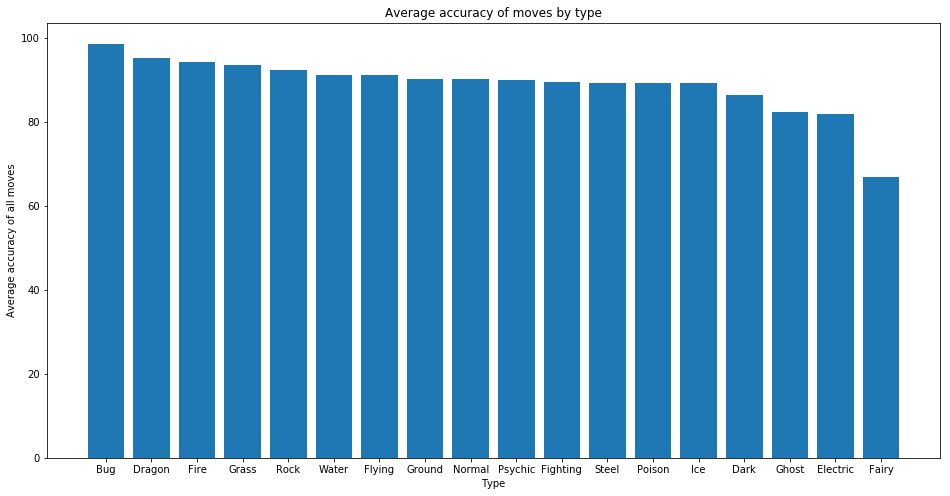

In [20]:
x_val7 = [x[0] for x in accuracy_by_type_data]
y_val7 = [x[1] for x in accuracy_by_type_data]

move_type_graph = plt.figure()
move_type_graph.set_figwidth(16)
move_type_graph.set_figheight(8)
  
plt.bar(x_val7,y_val7,align='center')
plt.xlabel('Type')
plt.ylabel('Average accuracy of all moves')
plt.title("Average accuracy of moves by type")
plt.show()

## I can do the same for base power of moves

In [21]:
q23 = """SELECT type, AVG(Power)
FROM move
WHERE category <> 'Status'
GROUP BY type
ORDER BY AVG(Power) DESC;"""

power_by_type_data = read_query(connection, q23)

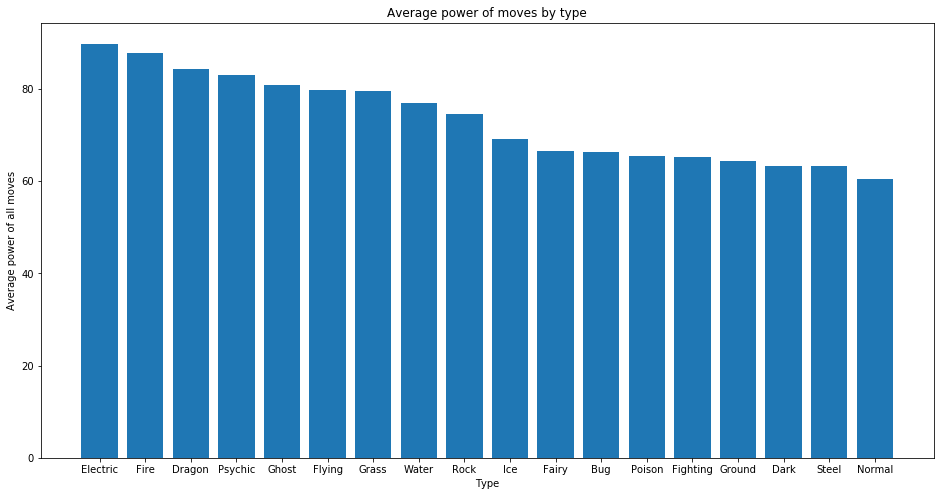

In [22]:
x_val8 = [x[0] for x in power_by_type_data]
y_val8 = [x[1] for x in power_by_type_data]

move_type_graph = plt.figure()
move_type_graph.set_figwidth(16)
move_type_graph.set_figheight(8)
  
plt.bar(x_val8,y_val8,align='center')
plt.xlabel('Type')
plt.ylabel('Average power of all moves')
plt.title("Average power of moves by type")
plt.show()

## Last up for the move table, let's count the number of status-inflicting moves and group them by type

In [23]:
q24 = """SELECT type, COUNT(Category)
FROM move
WHERE category = 'Status'
GROUP BY type
ORDER BY COUNT(Category) DESC;"""

status_number_by_type_data = read_query(connection, q24)

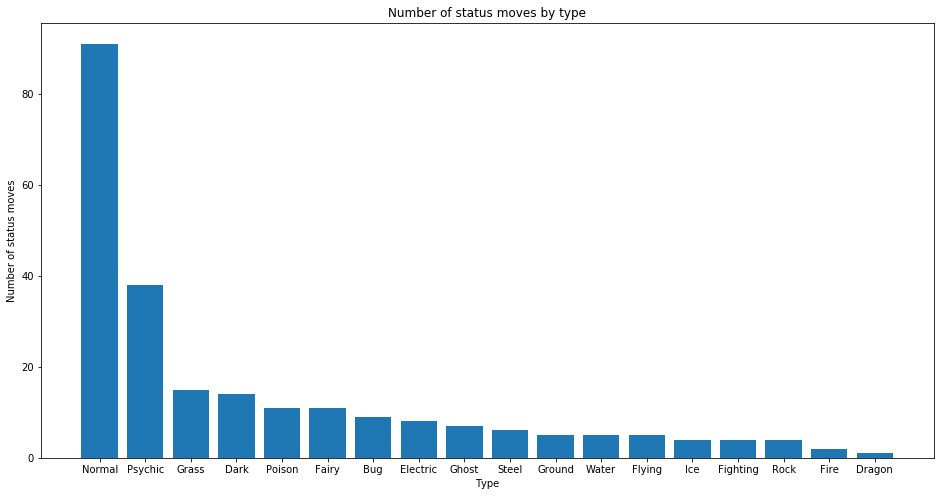

In [24]:
x_val9 = [x[0] for x in status_number_by_type_data]
y_val9 = [x[1] for x in status_number_by_type_data]

move_type_graph = plt.figure()
move_type_graph.set_figwidth(16)
move_type_graph.set_figheight(8)
  
plt.bar(x_val9,y_val9,align='center')
plt.xlabel('Type')
plt.ylabel('Number of status moves')
plt.title("Number of status moves by type")
plt.show()

## Now I will do some pandas-specific exploration of the data. If I hadn't made all the graphs above already and I wanted to find the max base attack of all Pokemon, I could make a dataframe of all the Pokemon with the simpler method read_sql and then explore that dataframe with pandas methods. 

In [10]:
allpokemondf.describe(include='all')

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.000000,1045.000000,1045,1045,1045,1045.000000,1045,1045,1045.000000,1045,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
unique,NaN,NaN,1045,898,898,NaN,4,652,NaN,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Throh,Rotom,ロトム (Rotom),NaN,Normal,Mouse Pokémon,NaN,Water,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,6,6,NaN,918,12,NaN,134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,522.000000,440.769378,NaN,NaN,NaN,4.098565,NaN,NaN,1.529187,NaN,...,1.140670,1.244019,1.048804,1.144498,1.314833,1.049761,1.007656,1.152153,1.130144,1.184689
std,301.809819,262.517231,NaN,NaN,NaN,2.272788,NaN,NaN,0.499386,NaN,...,0.759563,0.534961,0.465795,0.544197,0.638350,0.554857,0.355497,0.402111,0.406250,0.464604
min,0.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,261.000000,212.000000,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,522.000000,436.000000,NaN,NaN,NaN,4.000000,NaN,NaN,2.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,783.000000,670.000000,NaN,NaN,NaN,6.000000,NaN,NaN,2.000000,NaN,...,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
allpokemondf['attack'].describe()

count    1045.000000
mean       80.476555
std        32.432728
min         5.000000
25%        55.000000
50%        77.000000
75%       100.000000
max       190.000000
Name: attack, dtype: float64

This means the highest base attack value is 190. To find out which Pokemon has that attack value, I will use the idxmax method.

In [21]:
allpokemondf['attack'].idxmax()

194

The 194th entry in the dataframe contains the pokemon with the highest attack. Using one more method, I can find out which Pokemon that is.

In [24]:
allpokemondf.at[194,'name']

'Mega Mewtwo X'

## Although base stat total is not the end-all be-all indicator of how strong a Pokemon is, it is useful to see how is distributed accross different generations and to find out what it's correlated with.

### Below I generated boxplots for base stat total for each generation of Pokemon. We can see that Generations 1 and 8 have some high outliers.

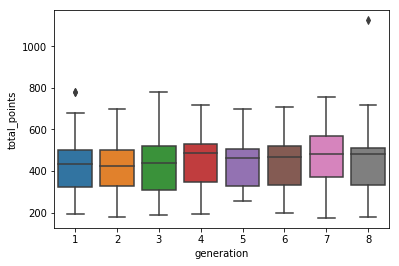

In [26]:
sns.boxplot(x="generation", y="total_points", data=allpokemondf)
plt.show()

From this boxplot, there is a lot of overlap between the generations. We can se 5 has a higher floor than the others, but if we were trying to determine a Pokemon's base stat total, the generation it origniated from is not a good indicator. To find out what could be a good indicator of base stat total, I need to find out which attributes of a Pokemon it correlates to. To do that...

### I can also see how correlated any two numerical values are

In [21]:
corrdf = allpokemondf.corr()
corrdf.head()

,id,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
id,1.000000,0.999866,0.963009,0.041696,0.062311,0.120771,-0.158666,0.137483,0.118802,0.123622,...,0.033151,0.037286,-0.074792,0.013798,-0.028011,0.102780,0.041709,0.083520,0.106277,0.133696
pokedex_number,0.999866,1.000000,0.963664,0.042805,0.062690,0.120389,-0.157993,0.136512,0.117898,0.122968,...,0.034538,0.037594,-0.073048,0.012966,-0.027443,0.102427,0.041546,0.082824,0.107144,0.134706
generation,0.963009,0.963664,1.000000,0.037549,0.052947,0.084487,-0.139946,0.091050,0.098174,0.088075,...,0.038568,0.056616,-0.057931,0.007835,-0.020089,0.094090,0.014477,0.077902,0.087759,0.116996
type_number,0.041696,0.042805,0.037549,1.000000,0.085050,0.108467,-0.051827,0.212363,0.091722,0.140603,...,-0.044925,0.104183,-0.028778,-0.105410,0.231056,0.126114,0.052695,0.075649,0.047358,0.143944
height_m,0.062311,0.062690,0.052947,0.085050,1.000000,0.636966,-0.169632,0.376983,0.377259,0.211089,...,0.040468,-0.039375,0.059005,-0.017876,-0.034778,0.021720,0.177479,-0.001250,-0.015929,0.048526


## To find out which attribute base stat total is most strongly correlated with, I can do the following

In [15]:
corrdf["total_points"]

id                  0.137483
pokedex_number      0.136512
generation          0.091050
type_number         0.212363
height_m            0.376983
weight_kg           0.477183
abilities_number   -0.432820
total_points        1.000000
hp                  0.650568
attack              0.733028
defense             0.629656
sp_attack           0.732795
sp_defense          0.719940
speed               0.561368
catch_rate         -0.727788
base_friendship    -0.327835
base_experience     0.929630
egg_type_number    -0.094801
percentage_male     0.116031
egg_cycles          0.542124
against_normal     -0.036199
against_fire       -0.062507
against_water      -0.006566
against_electric   -0.036058
against_grass      -0.056067
against_ice        -0.001318
against_fight       0.014099
against_poison     -0.098725
against_ground      0.020758
against_flying     -0.079492
against_psychic    -0.028538
against_bug        -0.011518
against_rock       -0.036226
against_ghost       0.157169
against_dragon

From this list, I can see that the attribute "base_experience" is the most-correlated attribute with base stat total (other than base stat total itself), and because it is a positive number that means there is a positive correlation. The higher the base experience, the higher the BST will be. To see this visually, I can...

In [19]:
sns.regplot(x="total_points", y="base_experience", data=allpokemondf)
plt.ylim(0,)
plt.title("Correlation of base expereince and base stat total")

Text(0.5, 1.0, 'Correlation of base expereince and base stat total')

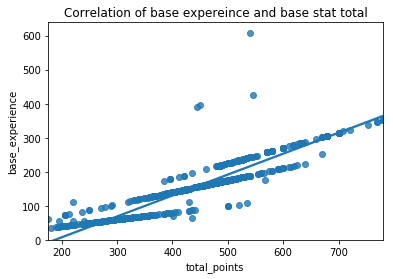

In [20]:
plt.show()

## Lastly, before moving into JOINing tables, a quick seaborn demonstration.

Seaborn can be used to create all kinds of interesting visualizations of data. Below you can see every Pokemon represented as a dot representing their base attack stat and their primary type (type_1). As I found out in the last part, Mega Mewtwo X has the highest base attack stat. I know that Pokemon's type_1 is Psychic, and we can see that the highest dot in the chart below is indeed within the Psychic type range. 

In [65]:
fig, ax = plt.subplots(1,1)
ax = sns.swarmplot(x='type_1', y='attack', data=allpokemondf, size=5)
fig.set_figwidth(16)
fig.set_figheight(8)
  
#plt.setup(plot.get_xticklabels(), rotation=70)
plt.title('Attack by Primary Type')

<function matplotlib.pyplot.show>

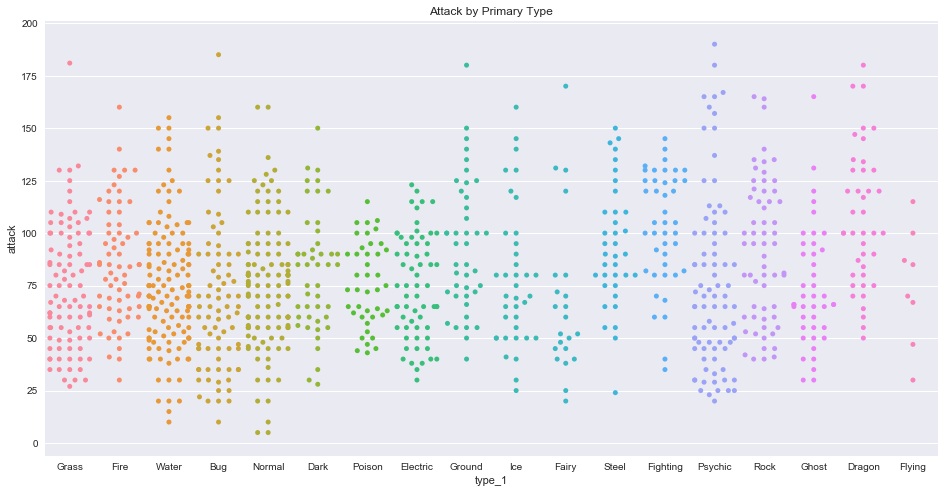

In [66]:
plt.show()

I can perform a similar analysis for any combination of attributes I'm interested in. I'll do one more for base speed by primary type. My data contains up-to-date information, and the recently-added Regieleki (an electric type), should have the highest base speed of 200.

In [73]:
fig, ax = plt.subplots(1,1)
ax = sns.swarmplot(x='type_1', y='speed', data=allpokemondf, size=5)
fig.set_figwidth(16)
fig.set_figheight(8)
  
#plt.setup(plot.get_xticklabels(), rotation=70)
plt.title('Speed by Primary Type')

Text(0.5, 1.0, 'Speed by Primary Type')

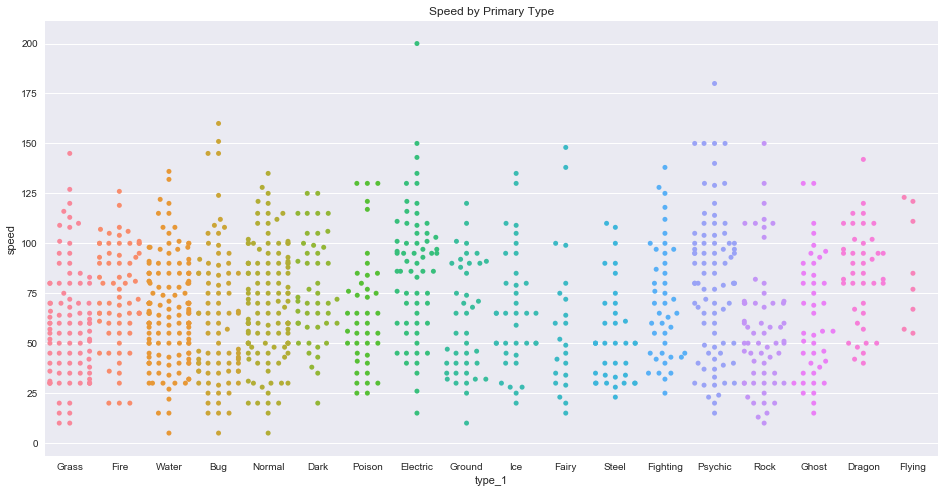

In [74]:
plt.show()

## Seaborn also enables me to visually see if any two attributes are correlated. Below I'll plot defense on the y axis and attack on the x axis for all Pokemon. Based on how linear the plot is and the calculated pearson r value, I can tell that these two attributes are not very correlated.

In [81]:
ax = sns.jointplot(x='attack', y='defense', data=allpokemondf)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


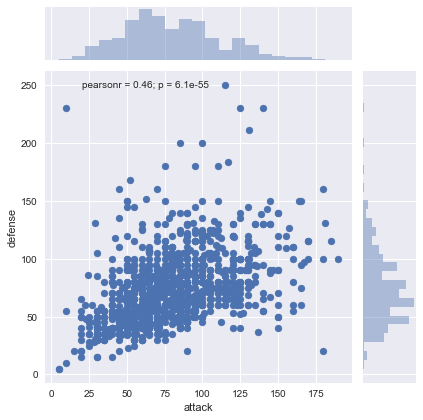

In [82]:
plt.show()

I'll do one more investigation like this, this time into Special defense and HP stats. I expect these to be more correlated than the last example.

In [83]:
ax = sns.jointplot(x='sp_defense', y='hp', data=allpokemondf)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


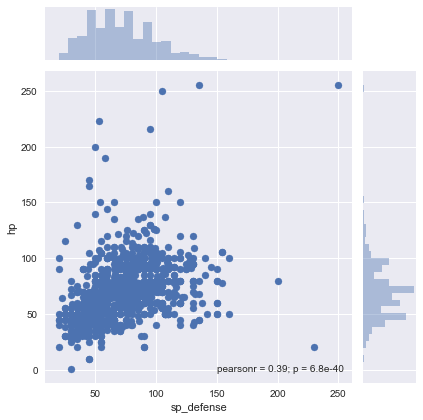

In [84]:
plt.show()

## From just this one graph I can tell that my prediction was wrong! 

There is one example, Eternatus eternamax, that has very high HP and special defense, but overall these two stats are actually less correlated than attack and defense as evident from the lower pearson r value. 

## That was all done using invidivudal tables within the database, such as the Pokemon or Move table. Now let's JOIN tables to see all Pokemon who can learn certain moves by JOINing Pokemon, Move, and Moveset

#### I'll start by finding all Pokemon who can learn the move Aerial Ace. Unfortunately, due to the way the data I've pulled from various sources is structured I haven't been able to find a more efficient way to write the SQL quer. You will need to scroll past some repetetive code to see the results. It's worth it! 

## Enter the following into your Cntrl/Cmnd+F to skip to the visuals: Guaranteed-Hit Moves 

#### (Don't worry -- I used Python to automate writing these long strings. When a SQL solution can't be found, python can help!)

In [20]:
connection = create_db_connection("localhost", "root", pw, db) # Connect to the Database

q6 = """SELECT 'Aerial Ace', COUNT(species) FROM moveset
WHERE move1 LIKE '%Aerial Ace' 
OR move2 LIKE '%Aerial Ace' 
OR move3 LIKE '%Aerial Ace' 
OR move4 LIKE '%Aerial Ace' 
OR move5 LIKE '%Aerial Ace' 
OR move6 LIKE '%Aerial Ace' 
OR move7 LIKE '%Aerial Ace' 
OR move8 LIKE '%Aerial Ace' 
OR move9 LIKE '%Aerial Ace' 
OR move10 LIKE '%Aerial Ace' 
OR move11 LIKE '%Aerial Ace' 
OR move12 LIKE '%Aerial Ace' 
OR move13 LIKE '%Aerial Ace' 
OR move14 LIKE '%Aerial Ace' 
OR move15 LIKE '%Aerial Ace' 
OR move16 LIKE '%Aerial Ace' 
OR move17 LIKE '%Aerial Ace' 
OR move18 LIKE '%Aerial Ace' 
OR move19 LIKE '%Aerial Ace' 
OR move20 LIKE '%Aerial Ace' 
OR move21 LIKE '%Aerial Ace' 
OR move22 LIKE '%Aerial Ace' 
OR move23 LIKE '%Aerial Ace' 
OR move24 LIKE '%Aerial Ace' 
OR move25 LIKE '%Aerial Ace' 
OR move26 LIKE '%Aerial Ace' 
OR move27 LIKE '%Aerial Ace' 
OR move28 LIKE '%Aerial Ace' 
OR move29 LIKE '%Aerial Ace' 
OR move30 LIKE '%Aerial Ace' 
OR move31 LIKE '%Aerial Ace' 
OR move32 LIKE '%Aerial Ace' 
OR move33 LIKE '%Aerial Ace' 
OR move34 LIKE '%Aerial Ace' 
OR move35 LIKE '%Aerial Ace' 
OR move36 LIKE '%Aerial Ace' 
OR move37 LIKE '%Aerial Ace' 
OR move38 LIKE '%Aerial Ace' 
OR move39 LIKE '%Aerial Ace' 
OR move40 LIKE '%Aerial Ace' 
OR move41 LIKE '%Aerial Ace' 
OR move42 LIKE '%Aerial Ace' 
OR move43 LIKE '%Aerial Ace' 
OR move44 LIKE '%Aerial Ace' 
OR move45 LIKE '%Aerial Ace' 
OR move46 LIKE '%Aerial Ace' 
OR move47 LIKE '%Aerial Ace' 
OR move48 LIKE '%Aerial Ace' 
OR move49 LIKE '%Aerial Ace' 
OR move50 LIKE '%Aerial Ace' 
OR move51 LIKE '%Aerial Ace' 
OR move52 LIKE '%Aerial Ace' 
OR move53 LIKE '%Aerial Ace' 
OR move54 LIKE '%Aerial Ace' 
OR move55 LIKE '%Aerial Ace' 
OR move56 LIKE '%Aerial Ace' 
OR move57 LIKE '%Aerial Ace' 
OR move58 LIKE '%Aerial Ace' 
OR move59 LIKE '%Aerial Ace' 
OR move60 LIKE '%Aerial Ace' 
OR move61 LIKE '%Aerial Ace' 
OR move62 LIKE '%Aerial Ace' 
OR move63 LIKE '%Aerial Ace' 
OR move64 LIKE '%Aerial Ace' 
OR move65 LIKE '%Aerial Ace' 
OR move66 LIKE '%Aerial Ace' 
OR move67 LIKE '%Aerial Ace' 
OR move68 LIKE '%Aerial Ace' 
OR move69 LIKE '%Aerial Ace' 
OR move70 LIKE '%Aerial Ace' 
OR move71 LIKE '%Aerial Ace' 
OR move72 LIKE '%Aerial Ace' 
OR move73 LIKE '%Aerial Ace' 
OR move74 LIKE '%Aerial Ace' 
OR move75 LIKE '%Aerial Ace' 
OR move76 LIKE '%Aerial Ace' 
OR move77 LIKE '%Aerial Ace' 
OR move78 LIKE '%Aerial Ace' 
OR move79 LIKE '%Aerial Ace' 
OR move80 LIKE '%Aerial Ace' 
OR move81 LIKE '%Aerial Ace' 
OR move82 LIKE '%Aerial Ace' 
OR move83 LIKE '%Aerial Ace' 
OR move84 LIKE '%Aerial Ace' 
OR move85 LIKE '%Aerial Ace' 
OR move86 LIKE '%Aerial Ace' 
OR move87 LIKE '%Aerial Ace' 
OR move88 LIKE '%Aerial Ace' 
OR move89 LIKE '%Aerial Ace' 
OR move90 LIKE '%Aerial Ace' 
OR move91 LIKE '%Aerial Ace' 
OR move92 LIKE '%Aerial Ace' 
OR move93 LIKE '%Aerial Ace' 
OR move94 LIKE '%Aerial Ace' 
OR move95 LIKE '%Aerial Ace' 
OR move96 LIKE '%Aerial Ace' 
OR move97 LIKE '%Aerial Ace' 
OR move98 LIKE '%Aerial Ace' 
OR move99 LIKE '%Aerial Ace' 
OR move100 LIKE '%Aerial Ace' 
OR move101 LIKE '%Aerial Ace' 
OR move102 LIKE '%Aerial Ace' 
OR move103 LIKE '%Aerial Ace' 
OR move104 LIKE '%Aerial Ace' 
OR move105 LIKE '%Aerial Ace' 
OR move106 LIKE '%Aerial Ace' 
OR move107 LIKE '%Aerial Ace' 
OR move108 LIKE '%Aerial Ace' 
OR move109 LIKE '%Aerial Ace' 
OR move110 LIKE '%Aerial Ace' 
OR move111 LIKE '%Aerial Ace' 
OR move112 LIKE '%Aerial Ace' 
OR move113 LIKE '%Aerial Ace' 
OR move114 LIKE '%Aerial Ace' 
OR move115 LIKE '%Aerial Ace' 
OR move116 LIKE '%Aerial Ace' 
OR move117 LIKE '%Aerial Ace' 
OR move118 LIKE '%Aerial Ace' 
OR move119 LIKE '%Aerial Ace' 
OR move120 LIKE '%Aerial Ace' 
OR move121 LIKE '%Aerial Ace' 
OR move122 LIKE '%Aerial Ace' 
OR move123 LIKE '%Aerial Ace' 
OR move124 LIKE '%Aerial Ace' 
OR move125 LIKE '%Aerial Ace' 
OR move126 LIKE '%Aerial Ace' 
OR move127 LIKE '%Aerial Ace' 
OR move128 LIKE '%Aerial Ace' 
OR move129 LIKE '%Aerial Ace' 
OR move130 LIKE '%Aerial Ace' 
OR move131 LIKE '%Aerial Ace' 
OR move132 LIKE '%Aerial Ace' 
OR move133 LIKE '%Aerial Ace' 
OR move134 LIKE '%Aerial Ace' 
OR move135 LIKE '%Aerial Ace' 
OR move136 LIKE '%Aerial Ace' 
OR move137 LIKE '%Aerial Ace' 
OR move138 LIKE '%Aerial Ace' 
OR move139 LIKE '%Aerial Ace' 
OR move140 LIKE '%Aerial Ace' 
OR move141 LIKE '%Aerial Ace' 
OR move142 LIKE '%Aerial Ace' 
OR move143 LIKE '%Aerial Ace' 
OR move144 LIKE '%Aerial Ace' 
OR move145 LIKE '%Aerial Ace' 
OR move146 LIKE '%Aerial Ace' 
OR move147 LIKE '%Aerial Ace' 
OR move148 LIKE '%Aerial Ace' 
OR move149 LIKE '%Aerial Ace' 
OR move150 LIKE '%Aerial Ace' 
OR move151 LIKE '%Aerial Ace' 
OR move152 LIKE '%Aerial Ace' 
OR move153 LIKE '%Aerial Ace' 
OR move154 LIKE '%Aerial Ace' 
OR move155 LIKE '%Aerial Ace' 
OR move156 LIKE '%Aerial Ace' 
OR move157 LIKE '%Aerial Ace' 
OR move158 LIKE '%Aerial Ace' 
OR move159 LIKE '%Aerial Ace' 
OR move160 LIKE '%Aerial Ace' 
OR move161 LIKE '%Aerial Ace' 
OR move162 LIKE '%Aerial Ace' 
OR move163 LIKE '%Aerial Ace' 
OR move164 LIKE '%Aerial Ace' 
OR move165 LIKE '%Aerial Ace' 
OR move166 LIKE '%Aerial Ace' 
OR move167 LIKE '%Aerial Ace' 
OR move168 LIKE '%Aerial Ace' 
OR move169 LIKE '%Aerial Ace' 
OR move170 LIKE '%Aerial Ace' 
OR move171 LIKE '%Aerial Ace' 
OR move172 LIKE '%Aerial Ace' 
OR move173 LIKE '%Aerial Ace';
"""

#fetchall method (used by read_query) returns a list of tuples
aerial_ace_learners = read_query(connection, q6)

MySQL Database connection successful


In [21]:
q7 = """SELECT 'Shock wave', COUNT(species) FROM moveset
WHERE move1 LIKE '%Shock wave'
OR move2 LIKE '%Shock wave' 
OR move3 LIKE '%Shock wave' 
OR move4 LIKE '%Shock wave' 
OR move5 LIKE '%Shock wave' 
OR move6 LIKE '%Shock wave' 
OR move7 LIKE '%Shock wave' 
OR move8 LIKE '%Shock wave' 
OR move9 LIKE '%Shock wave' 
OR move10 LIKE '%Shock wave' 
OR move11 LIKE '%Shock wave' 
OR move12 LIKE '%Shock wave' 
OR move13 LIKE '%Shock wave' 
OR move14 LIKE '%Shock wave' 
OR move15 LIKE '%Shock wave' 
OR move16 LIKE '%Shock wave' 
OR move17 LIKE '%Shock wave' 
OR move18 LIKE '%Shock wave' 
OR move19 LIKE '%Shock wave' 
OR move20 LIKE '%Shock wave' 
OR move21 LIKE '%Shock wave' 
OR move22 LIKE '%Shock wave' 
OR move23 LIKE '%Shock wave' 
OR move24 LIKE '%Shock wave' 
OR move25 LIKE '%Shock wave' 
OR move26 LIKE '%Shock wave' 
OR move27 LIKE '%Shock wave' 
OR move28 LIKE '%Shock wave' 
OR move29 LIKE '%Shock wave' 
OR move30 LIKE '%Shock wave' 
OR move31 LIKE '%Shock wave' 
OR move32 LIKE '%Shock wave' 
OR move33 LIKE '%Shock wave' 
OR move34 LIKE '%Shock wave' 
OR move35 LIKE '%Shock wave' 
OR move36 LIKE '%Shock wave' 
OR move37 LIKE '%Shock wave' 
OR move38 LIKE '%Shock wave' 
OR move39 LIKE '%Shock wave' 
OR move40 LIKE '%Shock wave' 
OR move41 LIKE '%Shock wave' 
OR move42 LIKE '%Shock wave' 
OR move43 LIKE '%Shock wave' 
OR move44 LIKE '%Shock wave' 
OR move45 LIKE '%Shock wave' 
OR move46 LIKE '%Shock wave' 
OR move47 LIKE '%Shock wave' 
OR move48 LIKE '%Shock wave' 
OR move49 LIKE '%Shock wave' 
OR move50 LIKE '%Shock wave' 
OR move51 LIKE '%Shock wave' 
OR move52 LIKE '%Shock wave' 
OR move53 LIKE '%Shock wave' 
OR move54 LIKE '%Shock wave' 
OR move55 LIKE '%Shock wave' 
OR move56 LIKE '%Shock wave' 
OR move57 LIKE '%Shock wave' 
OR move58 LIKE '%Shock wave' 
OR move59 LIKE '%Shock wave' 
OR move60 LIKE '%Shock wave' 
OR move61 LIKE '%Shock wave' 
OR move62 LIKE '%Shock wave' 
OR move63 LIKE '%Shock wave' 
OR move64 LIKE '%Shock wave' 
OR move65 LIKE '%Shock wave' 
OR move66 LIKE '%Shock wave' 
OR move67 LIKE '%Shock wave' 
OR move68 LIKE '%Shock wave' 
OR move69 LIKE '%Shock wave' 
OR move70 LIKE '%Shock wave' 
OR move71 LIKE '%Shock wave' 
OR move72 LIKE '%Shock wave' 
OR move73 LIKE '%Shock wave' 
OR move74 LIKE '%Shock wave' 
OR move75 LIKE '%Shock wave' 
OR move76 LIKE '%Shock wave' 
OR move77 LIKE '%Shock wave' 
OR move78 LIKE '%Shock wave' 
OR move79 LIKE '%Shock wave' 
OR move80 LIKE '%Shock wave' 
OR move81 LIKE '%Shock wave' 
OR move82 LIKE '%Shock wave' 
OR move83 LIKE '%Shock wave' 
OR move84 LIKE '%Shock wave' 
OR move85 LIKE '%Shock wave' 
OR move86 LIKE '%Shock wave' 
OR move87 LIKE '%Shock wave' 
OR move88 LIKE '%Shock wave' 
OR move89 LIKE '%Shock wave' 
OR move90 LIKE '%Shock wave' 
OR move91 LIKE '%Shock wave' 
OR move92 LIKE '%Shock wave' 
OR move93 LIKE '%Shock wave' 
OR move94 LIKE '%Shock wave' 
OR move95 LIKE '%Shock wave' 
OR move96 LIKE '%Shock wave' 
OR move97 LIKE '%Shock wave' 
OR move98 LIKE '%Shock wave' 
OR move99 LIKE '%Shock wave' 
OR move100 LIKE '%Shock wave' 
OR move101 LIKE '%Shock wave' 
OR move102 LIKE '%Shock wave' 
OR move103 LIKE '%Shock wave' 
OR move104 LIKE '%Shock wave' 
OR move105 LIKE '%Shock wave' 
OR move106 LIKE '%Shock wave' 
OR move107 LIKE '%Shock wave' 
OR move108 LIKE '%Shock wave' 
OR move109 LIKE '%Shock wave' 
OR move110 LIKE '%Shock wave' 
OR move111 LIKE '%Shock wave' 
OR move112 LIKE '%Shock wave' 
OR move113 LIKE '%Shock wave' 
OR move114 LIKE '%Shock wave' 
OR move115 LIKE '%Shock wave' 
OR move116 LIKE '%Shock wave' 
OR move117 LIKE '%Shock wave' 
OR move118 LIKE '%Shock wave' 
OR move119 LIKE '%Shock wave' 
OR move120 LIKE '%Shock wave' 
OR move121 LIKE '%Shock wave' 
OR move122 LIKE '%Shock wave' 
OR move123 LIKE '%Shock wave' 
OR move124 LIKE '%Shock wave' 
OR move125 LIKE '%Shock wave' 
OR move126 LIKE '%Shock wave' 
OR move127 LIKE '%Shock wave' 
OR move128 LIKE '%Shock wave' 
OR move129 LIKE '%Shock wave' 
OR move130 LIKE '%Shock wave' 
OR move131 LIKE '%Shock wave' 
OR move132 LIKE '%Shock wave' 
OR move133 LIKE '%Shock wave' 
OR move134 LIKE '%Shock wave' 
OR move135 LIKE '%Shock wave' 
OR move136 LIKE '%Shock wave' 
OR move137 LIKE '%Shock wave' 
OR move138 LIKE '%Shock wave' 
OR move139 LIKE '%Shock wave' 
OR move140 LIKE '%Shock wave' 
OR move141 LIKE '%Shock wave' 
OR move142 LIKE '%Shock wave' 
OR move143 LIKE '%Shock wave' 
OR move144 LIKE '%Shock wave' 
OR move145 LIKE '%Shock wave' 
OR move146 LIKE '%Shock wave' 
OR move147 LIKE '%Shock wave' 
OR move148 LIKE '%Shock wave' 
OR move149 LIKE '%Shock wave' 
OR move150 LIKE '%Shock wave' 
OR move151 LIKE '%Shock wave' 
OR move152 LIKE '%Shock wave' 
OR move153 LIKE '%Shock wave' 
OR move154 LIKE '%Shock wave' 
OR move155 LIKE '%Shock wave' 
OR move156 LIKE '%Shock wave' 
OR move157 LIKE '%Shock wave' 
OR move158 LIKE '%Shock wave' 
OR move159 LIKE '%Shock wave' 
OR move160 LIKE '%Shock wave' 
OR move161 LIKE '%Shock wave' 
OR move162 LIKE '%Shock wave' 
OR move163 LIKE '%Shock wave' 
OR move164 LIKE '%Shock wave' 
OR move165 LIKE '%Shock wave' 
OR move166 LIKE '%Shock wave' 
OR move167 LIKE '%Shock wave' 
OR move168 LIKE '%Shock wave' 
OR move169 LIKE '%Shock wave' 
OR move170 LIKE '%Shock wave' 
OR move171 LIKE '%Shock wave' 
OR move172 LIKE '%Shock wave' 
OR move173 LIKE '%Shock wave';
"""

#fetchall method (used by read_query) returns a list of tuples
shockwave_learners = read_query(connection, q7)

In [22]:
q8 = """SELECT 'Aura sphere', COUNT(species) FROM moveset
WHERE move1 LIKE '%Aura sphere'
OR move2 LIKE '%Aura sphere' 
OR move3 LIKE '%Aura sphere' 
OR move4 LIKE '%Aura sphere' 
OR move5 LIKE '%Aura sphere' 
OR move6 LIKE '%Aura sphere' 
OR move7 LIKE '%Aura sphere' 
OR move8 LIKE '%Aura sphere' 
OR move9 LIKE '%Aura sphere' 
OR move10 LIKE '%Aura sphere' 
OR move11 LIKE '%Aura sphere' 
OR move12 LIKE '%Aura sphere' 
OR move13 LIKE '%Aura sphere' 
OR move14 LIKE '%Aura sphere' 
OR move15 LIKE '%Aura sphere' 
OR move16 LIKE '%Aura sphere' 
OR move17 LIKE '%Aura sphere' 
OR move18 LIKE '%Aura sphere' 
OR move19 LIKE '%Aura sphere' 
OR move20 LIKE '%Aura sphere' 
OR move21 LIKE '%Aura sphere' 
OR move22 LIKE '%Aura sphere' 
OR move23 LIKE '%Aura sphere' 
OR move24 LIKE '%Aura sphere' 
OR move25 LIKE '%Aura sphere' 
OR move26 LIKE '%Aura sphere' 
OR move27 LIKE '%Aura sphere' 
OR move28 LIKE '%Aura sphere' 
OR move29 LIKE '%Aura sphere' 
OR move30 LIKE '%Aura sphere' 
OR move31 LIKE '%Aura sphere' 
OR move32 LIKE '%Aura sphere' 
OR move33 LIKE '%Aura sphere' 
OR move34 LIKE '%Aura sphere' 
OR move35 LIKE '%Aura sphere' 
OR move36 LIKE '%Aura sphere' 
OR move37 LIKE '%Aura sphere' 
OR move38 LIKE '%Aura sphere' 
OR move39 LIKE '%Aura sphere' 
OR move40 LIKE '%Aura sphere' 
OR move41 LIKE '%Aura sphere' 
OR move42 LIKE '%Aura sphere' 
OR move43 LIKE '%Aura sphere' 
OR move44 LIKE '%Aura sphere' 
OR move45 LIKE '%Aura sphere' 
OR move46 LIKE '%Aura sphere' 
OR move47 LIKE '%Aura sphere' 
OR move48 LIKE '%Aura sphere' 
OR move49 LIKE '%Aura sphere' 
OR move50 LIKE '%Aura sphere' 
OR move51 LIKE '%Aura sphere' 
OR move52 LIKE '%Aura sphere' 
OR move53 LIKE '%Aura sphere' 
OR move54 LIKE '%Aura sphere' 
OR move55 LIKE '%Aura sphere' 
OR move56 LIKE '%Aura sphere' 
OR move57 LIKE '%Aura sphere' 
OR move58 LIKE '%Aura sphere' 
OR move59 LIKE '%Aura sphere' 
OR move60 LIKE '%Aura sphere' 
OR move61 LIKE '%Aura sphere' 
OR move62 LIKE '%Aura sphere' 
OR move63 LIKE '%Aura sphere' 
OR move64 LIKE '%Aura sphere' 
OR move65 LIKE '%Aura sphere' 
OR move66 LIKE '%Aura sphere' 
OR move67 LIKE '%Aura sphere' 
OR move68 LIKE '%Aura sphere' 
OR move69 LIKE '%Aura sphere' 
OR move70 LIKE '%Aura sphere' 
OR move71 LIKE '%Aura sphere' 
OR move72 LIKE '%Aura sphere' 
OR move73 LIKE '%Aura sphere' 
OR move74 LIKE '%Aura sphere' 
OR move75 LIKE '%Aura sphere' 
OR move76 LIKE '%Aura sphere' 
OR move77 LIKE '%Aura sphere' 
OR move78 LIKE '%Aura sphere' 
OR move79 LIKE '%Aura sphere' 
OR move80 LIKE '%Aura sphere' 
OR move81 LIKE '%Aura sphere' 
OR move82 LIKE '%Aura sphere' 
OR move83 LIKE '%Aura sphere' 
OR move84 LIKE '%Aura sphere' 
OR move85 LIKE '%Aura sphere' 
OR move86 LIKE '%Aura sphere' 
OR move87 LIKE '%Aura sphere' 
OR move88 LIKE '%Aura sphere' 
OR move89 LIKE '%Aura sphere' 
OR move90 LIKE '%Aura sphere' 
OR move91 LIKE '%Aura sphere' 
OR move92 LIKE '%Aura sphere' 
OR move93 LIKE '%Aura sphere' 
OR move94 LIKE '%Aura sphere' 
OR move95 LIKE '%Aura sphere' 
OR move96 LIKE '%Aura sphere' 
OR move97 LIKE '%Aura sphere' 
OR move98 LIKE '%Aura sphere' 
OR move99 LIKE '%Aura sphere' 
OR move100 LIKE '%Aura sphere' 
OR move101 LIKE '%Aura sphere' 
OR move102 LIKE '%Aura sphere' 
OR move103 LIKE '%Aura sphere' 
OR move104 LIKE '%Aura sphere' 
OR move105 LIKE '%Aura sphere' 
OR move106 LIKE '%Aura sphere' 
OR move107 LIKE '%Aura sphere' 
OR move108 LIKE '%Aura sphere' 
OR move109 LIKE '%Aura sphere' 
OR move110 LIKE '%Aura sphere' 
OR move111 LIKE '%Aura sphere' 
OR move112 LIKE '%Aura sphere' 
OR move113 LIKE '%Aura sphere' 
OR move114 LIKE '%Aura sphere' 
OR move115 LIKE '%Aura sphere' 
OR move116 LIKE '%Aura sphere' 
OR move117 LIKE '%Aura sphere' 
OR move118 LIKE '%Aura sphere' 
OR move119 LIKE '%Aura sphere' 
OR move120 LIKE '%Aura sphere' 
OR move121 LIKE '%Aura sphere' 
OR move122 LIKE '%Aura sphere' 
OR move123 LIKE '%Aura sphere' 
OR move124 LIKE '%Aura sphere' 
OR move125 LIKE '%Aura sphere' 
OR move126 LIKE '%Aura sphere' 
OR move127 LIKE '%Aura sphere' 
OR move128 LIKE '%Aura sphere' 
OR move129 LIKE '%Aura sphere' 
OR move130 LIKE '%Aura sphere' 
OR move131 LIKE '%Aura sphere' 
OR move132 LIKE '%Aura sphere' 
OR move133 LIKE '%Aura sphere' 
OR move134 LIKE '%Aura sphere' 
OR move135 LIKE '%Aura sphere' 
OR move136 LIKE '%Aura sphere' 
OR move137 LIKE '%Aura sphere' 
OR move138 LIKE '%Aura sphere' 
OR move139 LIKE '%Aura sphere' 
OR move140 LIKE '%Aura sphere' 
OR move141 LIKE '%Aura sphere' 
OR move142 LIKE '%Aura sphere' 
OR move143 LIKE '%Aura sphere' 
OR move144 LIKE '%Aura sphere' 
OR move145 LIKE '%Aura sphere' 
OR move146 LIKE '%Aura sphere' 
OR move147 LIKE '%Aura sphere' 
OR move148 LIKE '%Aura sphere' 
OR move149 LIKE '%Aura sphere' 
OR move150 LIKE '%Aura sphere' 
OR move151 LIKE '%Aura sphere' 
OR move152 LIKE '%Aura sphere' 
OR move153 LIKE '%Aura sphere' 
OR move154 LIKE '%Aura sphere' 
OR move155 LIKE '%Aura sphere' 
OR move156 LIKE '%Aura sphere' 
OR move157 LIKE '%Aura sphere' 
OR move158 LIKE '%Aura sphere' 
OR move159 LIKE '%Aura sphere' 
OR move160 LIKE '%Aura sphere' 
OR move161 LIKE '%Aura sphere' 
OR move162 LIKE '%Aura sphere' 
OR move163 LIKE '%Aura sphere' 
OR move164 LIKE '%Aura sphere' 
OR move165 LIKE '%Aura sphere' 
OR move166 LIKE '%Aura sphere' 
OR move167 LIKE '%Aura sphere' 
OR move168 LIKE '%Aura sphere' 
OR move169 LIKE '%Aura sphere' 
OR move170 LIKE '%Aura sphere' 
OR move171 LIKE '%Aura sphere' 
OR move172 LIKE '%Aura sphere' 
OR move173 LIKE '%Aura sphere' 
;
"""

#fetchall method (used by read_query) returns a list of tuples
aura_sphere_learners = read_query(connection, q8)

In [23]:
q9 = """SELECT 'Magical leaf', COUNT(species) FROM moveset
WHERE move1 LIKE '%Magical leaf'
OR move2 LIKE '%Magical leaf' 
OR move3 LIKE '%Magical leaf' 
OR move4 LIKE '%Magical leaf' 
OR move5 LIKE '%Magical leaf' 
OR move6 LIKE '%Magical leaf' 
OR move7 LIKE '%Magical leaf' 
OR move8 LIKE '%Magical leaf' 
OR move9 LIKE '%Magical leaf' 
OR move10 LIKE '%Magical leaf' 
OR move11 LIKE '%Magical leaf' 
OR move12 LIKE '%Magical leaf' 
OR move13 LIKE '%Magical leaf' 
OR move14 LIKE '%Magical leaf' 
OR move15 LIKE '%Magical leaf' 
OR move16 LIKE '%Magical leaf' 
OR move17 LIKE '%Magical leaf' 
OR move18 LIKE '%Magical leaf' 
OR move19 LIKE '%Magical leaf' 
OR move20 LIKE '%Magical leaf' 
OR move21 LIKE '%Magical leaf' 
OR move22 LIKE '%Magical leaf' 
OR move23 LIKE '%Magical leaf' 
OR move24 LIKE '%Magical leaf' 
OR move25 LIKE '%Magical leaf' 
OR move26 LIKE '%Magical leaf' 
OR move27 LIKE '%Magical leaf' 
OR move28 LIKE '%Magical leaf' 
OR move29 LIKE '%Magical leaf' 
OR move30 LIKE '%Magical leaf' 
OR move31 LIKE '%Magical leaf' 
OR move32 LIKE '%Magical leaf' 
OR move33 LIKE '%Magical leaf' 
OR move34 LIKE '%Magical leaf' 
OR move35 LIKE '%Magical leaf' 
OR move36 LIKE '%Magical leaf' 
OR move37 LIKE '%Magical leaf' 
OR move38 LIKE '%Magical leaf' 
OR move39 LIKE '%Magical leaf' 
OR move40 LIKE '%Magical leaf' 
OR move41 LIKE '%Magical leaf' 
OR move42 LIKE '%Magical leaf' 
OR move43 LIKE '%Magical leaf' 
OR move44 LIKE '%Magical leaf' 
OR move45 LIKE '%Magical leaf' 
OR move46 LIKE '%Magical leaf' 
OR move47 LIKE '%Magical leaf' 
OR move48 LIKE '%Magical leaf' 
OR move49 LIKE '%Magical leaf' 
OR move50 LIKE '%Magical leaf' 
OR move51 LIKE '%Magical leaf' 
OR move52 LIKE '%Magical leaf' 
OR move53 LIKE '%Magical leaf' 
OR move54 LIKE '%Magical leaf' 
OR move55 LIKE '%Magical leaf' 
OR move56 LIKE '%Magical leaf' 
OR move57 LIKE '%Magical leaf' 
OR move58 LIKE '%Magical leaf' 
OR move59 LIKE '%Magical leaf' 
OR move60 LIKE '%Magical leaf' 
OR move61 LIKE '%Magical leaf' 
OR move62 LIKE '%Magical leaf' 
OR move63 LIKE '%Magical leaf' 
OR move64 LIKE '%Magical leaf' 
OR move65 LIKE '%Magical leaf' 
OR move66 LIKE '%Magical leaf' 
OR move67 LIKE '%Magical leaf' 
OR move68 LIKE '%Magical leaf' 
OR move69 LIKE '%Magical leaf' 
OR move70 LIKE '%Magical leaf' 
OR move71 LIKE '%Magical leaf' 
OR move72 LIKE '%Magical leaf' 
OR move73 LIKE '%Magical leaf' 
OR move74 LIKE '%Magical leaf' 
OR move75 LIKE '%Magical leaf' 
OR move76 LIKE '%Magical leaf' 
OR move77 LIKE '%Magical leaf' 
OR move78 LIKE '%Magical leaf' 
OR move79 LIKE '%Magical leaf' 
OR move80 LIKE '%Magical leaf' 
OR move81 LIKE '%Magical leaf' 
OR move82 LIKE '%Magical leaf' 
OR move83 LIKE '%Magical leaf' 
OR move84 LIKE '%Magical leaf' 
OR move85 LIKE '%Magical leaf' 
OR move86 LIKE '%Magical leaf' 
OR move87 LIKE '%Magical leaf' 
OR move88 LIKE '%Magical leaf' 
OR move89 LIKE '%Magical leaf' 
OR move90 LIKE '%Magical leaf' 
OR move91 LIKE '%Magical leaf' 
OR move92 LIKE '%Magical leaf' 
OR move93 LIKE '%Magical leaf' 
OR move94 LIKE '%Magical leaf' 
OR move95 LIKE '%Magical leaf' 
OR move96 LIKE '%Magical leaf' 
OR move97 LIKE '%Magical leaf' 
OR move98 LIKE '%Magical leaf' 
OR move99 LIKE '%Magical leaf' 
OR move100 LIKE '%Magical leaf' 
OR move101 LIKE '%Magical leaf' 
OR move102 LIKE '%Magical leaf' 
OR move103 LIKE '%Magical leaf' 
OR move104 LIKE '%Magical leaf' 
OR move105 LIKE '%Magical leaf' 
OR move106 LIKE '%Magical leaf' 
OR move107 LIKE '%Magical leaf' 
OR move108 LIKE '%Magical leaf' 
OR move109 LIKE '%Magical leaf' 
OR move110 LIKE '%Magical leaf' 
OR move111 LIKE '%Magical leaf' 
OR move112 LIKE '%Magical leaf' 
OR move113 LIKE '%Magical leaf' 
OR move114 LIKE '%Magical leaf' 
OR move115 LIKE '%Magical leaf' 
OR move116 LIKE '%Magical leaf' 
OR move117 LIKE '%Magical leaf' 
OR move118 LIKE '%Magical leaf' 
OR move119 LIKE '%Magical leaf' 
OR move120 LIKE '%Magical leaf' 
OR move121 LIKE '%Magical leaf' 
OR move122 LIKE '%Magical leaf' 
OR move123 LIKE '%Magical leaf' 
OR move124 LIKE '%Magical leaf' 
OR move125 LIKE '%Magical leaf' 
OR move126 LIKE '%Magical leaf' 
OR move127 LIKE '%Magical leaf' 
OR move128 LIKE '%Magical leaf' 
OR move129 LIKE '%Magical leaf' 
OR move130 LIKE '%Magical leaf' 
OR move131 LIKE '%Magical leaf' 
OR move132 LIKE '%Magical leaf' 
OR move133 LIKE '%Magical leaf' 
OR move134 LIKE '%Magical leaf' 
OR move135 LIKE '%Magical leaf' 
OR move136 LIKE '%Magical leaf' 
OR move137 LIKE '%Magical leaf' 
OR move138 LIKE '%Magical leaf' 
OR move139 LIKE '%Magical leaf' 
OR move140 LIKE '%Magical leaf' 
OR move141 LIKE '%Magical leaf' 
OR move142 LIKE '%Magical leaf' 
OR move143 LIKE '%Magical leaf' 
OR move144 LIKE '%Magical leaf' 
OR move145 LIKE '%Magical leaf' 
OR move146 LIKE '%Magical leaf' 
OR move147 LIKE '%Magical leaf' 
OR move148 LIKE '%Magical leaf' 
OR move149 LIKE '%Magical leaf' 
OR move150 LIKE '%Magical leaf' 
OR move151 LIKE '%Magical leaf' 
OR move152 LIKE '%Magical leaf' 
OR move153 LIKE '%Magical leaf' 
OR move154 LIKE '%Magical leaf' 
OR move155 LIKE '%Magical leaf' 
OR move156 LIKE '%Magical leaf' 
OR move157 LIKE '%Magical leaf' 
OR move158 LIKE '%Magical leaf' 
OR move159 LIKE '%Magical leaf' 
OR move160 LIKE '%Magical leaf' 
OR move161 LIKE '%Magical leaf' 
OR move162 LIKE '%Magical leaf' 
OR move163 LIKE '%Magical leaf' 
OR move164 LIKE '%Magical leaf' 
OR move165 LIKE '%Magical leaf' 
OR move166 LIKE '%Magical leaf' 
OR move167 LIKE '%Magical leaf' 
OR move168 LIKE '%Magical leaf' 
OR move169 LIKE '%Magical leaf' 
OR move170 LIKE '%Magical leaf' 
OR move171 LIKE '%Magical leaf' 
OR move172 LIKE '%Magical leaf' 
OR move173 LIKE '%Magical leaf';"""

magical_leaf_learners = read_query(connection, q9)

In [24]:
q10 = """SELECT 'Swift', COUNT(species) FROM moveset
WHERE move1 LIKE '%Swift'
OR move2 LIKE '%Swift' 
OR move3 LIKE '%Swift' 
OR move4 LIKE '%Swift' 
OR move5 LIKE '%Swift' 
OR move6 LIKE '%Swift' 
OR move7 LIKE '%Swift' 
OR move8 LIKE '%Swift' 
OR move9 LIKE '%Swift' 
OR move10 LIKE '%Swift' 
OR move11 LIKE '%Swift' 
OR move12 LIKE '%Swift' 
OR move13 LIKE '%Swift' 
OR move14 LIKE '%Swift' 
OR move15 LIKE '%Swift' 
OR move16 LIKE '%Swift' 
OR move17 LIKE '%Swift' 
OR move18 LIKE '%Swift' 
OR move19 LIKE '%Swift' 
OR move20 LIKE '%Swift' 
OR move21 LIKE '%Swift' 
OR move22 LIKE '%Swift' 
OR move23 LIKE '%Swift' 
OR move24 LIKE '%Swift' 
OR move25 LIKE '%Swift' 
OR move26 LIKE '%Swift' 
OR move27 LIKE '%Swift' 
OR move28 LIKE '%Swift' 
OR move29 LIKE '%Swift' 
OR move30 LIKE '%Swift' 
OR move31 LIKE '%Swift' 
OR move32 LIKE '%Swift' 
OR move33 LIKE '%Swift' 
OR move34 LIKE '%Swift' 
OR move35 LIKE '%Swift' 
OR move36 LIKE '%Swift' 
OR move37 LIKE '%Swift' 
OR move38 LIKE '%Swift' 
OR move39 LIKE '%Swift' 
OR move40 LIKE '%Swift' 
OR move41 LIKE '%Swift' 
OR move42 LIKE '%Swift' 
OR move43 LIKE '%Swift' 
OR move44 LIKE '%Swift' 
OR move45 LIKE '%Swift' 
OR move46 LIKE '%Swift' 
OR move47 LIKE '%Swift' 
OR move48 LIKE '%Swift' 
OR move49 LIKE '%Swift' 
OR move50 LIKE '%Swift' 
OR move51 LIKE '%Swift' 
OR move52 LIKE '%Swift' 
OR move53 LIKE '%Swift' 
OR move54 LIKE '%Swift' 
OR move55 LIKE '%Swift' 
OR move56 LIKE '%Swift' 
OR move57 LIKE '%Swift' 
OR move58 LIKE '%Swift' 
OR move59 LIKE '%Swift' 
OR move60 LIKE '%Swift' 
OR move61 LIKE '%Swift' 
OR move62 LIKE '%Swift' 
OR move63 LIKE '%Swift' 
OR move64 LIKE '%Swift' 
OR move65 LIKE '%Swift' 
OR move66 LIKE '%Swift' 
OR move67 LIKE '%Swift' 
OR move68 LIKE '%Swift' 
OR move69 LIKE '%Swift' 
OR move70 LIKE '%Swift' 
OR move71 LIKE '%Swift' 
OR move72 LIKE '%Swift' 
OR move73 LIKE '%Swift' 
OR move74 LIKE '%Swift' 
OR move75 LIKE '%Swift' 
OR move76 LIKE '%Swift' 
OR move77 LIKE '%Swift' 
OR move78 LIKE '%Swift' 
OR move79 LIKE '%Swift' 
OR move80 LIKE '%Swift' 
OR move81 LIKE '%Swift' 
OR move82 LIKE '%Swift' 
OR move83 LIKE '%Swift' 
OR move84 LIKE '%Swift' 
OR move85 LIKE '%Swift' 
OR move86 LIKE '%Swift' 
OR move87 LIKE '%Swift' 
OR move88 LIKE '%Swift' 
OR move89 LIKE '%Swift' 
OR move90 LIKE '%Swift' 
OR move91 LIKE '%Swift' 
OR move92 LIKE '%Swift' 
OR move93 LIKE '%Swift' 
OR move94 LIKE '%Swift' 
OR move95 LIKE '%Swift' 
OR move96 LIKE '%Swift' 
OR move97 LIKE '%Swift' 
OR move98 LIKE '%Swift' 
OR move99 LIKE '%Swift' 
OR move100 LIKE '%Swift' 
OR move101 LIKE '%Swift' 
OR move102 LIKE '%Swift' 
OR move103 LIKE '%Swift' 
OR move104 LIKE '%Swift' 
OR move105 LIKE '%Swift' 
OR move106 LIKE '%Swift' 
OR move107 LIKE '%Swift' 
OR move108 LIKE '%Swift' 
OR move109 LIKE '%Swift' 
OR move110 LIKE '%Swift' 
OR move111 LIKE '%Swift' 
OR move112 LIKE '%Swift' 
OR move113 LIKE '%Swift' 
OR move114 LIKE '%Swift' 
OR move115 LIKE '%Swift' 
OR move116 LIKE '%Swift' 
OR move117 LIKE '%Swift' 
OR move118 LIKE '%Swift' 
OR move119 LIKE '%Swift' 
OR move120 LIKE '%Swift' 
OR move121 LIKE '%Swift' 
OR move122 LIKE '%Swift' 
OR move123 LIKE '%Swift' 
OR move124 LIKE '%Swift' 
OR move125 LIKE '%Swift' 
OR move126 LIKE '%Swift' 
OR move127 LIKE '%Swift' 
OR move128 LIKE '%Swift' 
OR move129 LIKE '%Swift' 
OR move130 LIKE '%Swift' 
OR move131 LIKE '%Swift' 
OR move132 LIKE '%Swift' 
OR move133 LIKE '%Swift' 
OR move134 LIKE '%Swift' 
OR move135 LIKE '%Swift' 
OR move136 LIKE '%Swift' 
OR move137 LIKE '%Swift' 
OR move138 LIKE '%Swift' 
OR move139 LIKE '%Swift' 
OR move140 LIKE '%Swift' 
OR move141 LIKE '%Swift' 
OR move142 LIKE '%Swift' 
OR move143 LIKE '%Swift' 
OR move144 LIKE '%Swift' 
OR move145 LIKE '%Swift' 
OR move146 LIKE '%Swift' 
OR move147 LIKE '%Swift' 
OR move148 LIKE '%Swift' 
OR move149 LIKE '%Swift' 
OR move150 LIKE '%Swift' 
OR move151 LIKE '%Swift' 
OR move152 LIKE '%Swift' 
OR move153 LIKE '%Swift' 
OR move154 LIKE '%Swift' 
OR move155 LIKE '%Swift' 
OR move156 LIKE '%Swift' 
OR move157 LIKE '%Swift' 
OR move158 LIKE '%Swift' 
OR move159 LIKE '%Swift' 
OR move160 LIKE '%Swift' 
OR move161 LIKE '%Swift' 
OR move162 LIKE '%Swift' 
OR move163 LIKE '%Swift' 
OR move164 LIKE '%Swift' 
OR move165 LIKE '%Swift' 
OR move166 LIKE '%Swift' 
OR move167 LIKE '%Swift' 
OR move168 LIKE '%Swift' 
OR move169 LIKE '%Swift' 
OR move170 LIKE '%Swift' 
OR move171 LIKE '%Swift' 
OR move172 LIKE '%Swift' 
OR move173 LIKE '%Swift';"""

swift_learners = read_query(connection, q10)

In [25]:
guaranteed_hit_data = [] 
for x in aerial_ace_learners:
    guaranteed_hit_data.append(x)

for x in shockwave_learners:
    guaranteed_hit_data.append(x)
    
for x in swift_learners:
    guaranteed_hit_data.append(x)
    
for x in magical_leaf_learners:
    guaranteed_hit_data.append(x)
    
for x in aura_sphere_learners:
    guaranteed_hit_data.append(x)
    
print(guaranteed_hit_data)

[('Aerial Ace', 327), ('Shock wave', 273), ('Swift', 84), ('Magical leaf', 65), ('Aura sphere', 20)]


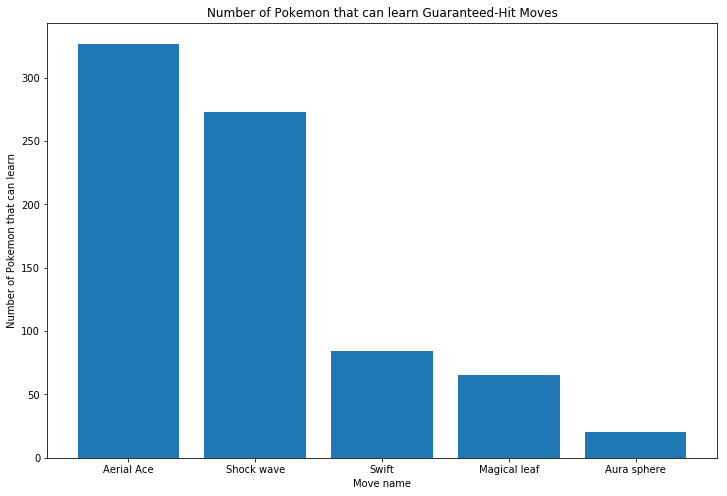

In [26]:
x_val6 = [x[0] for x in guaranteed_hit_data]
y_val6 = [x[1] for x in guaranteed_hit_data]

guaranteed_hit_graph = plt.figure()
guaranteed_hit_graph.set_figwidth(12)
guaranteed_hit_graph.set_figheight(8)
  
plt.bar(x_val6,y_val6,align='center')
plt.xlabel('Move name')
plt.ylabel('Number of Pokemon that can learn')
plt.title("Number of Pokemon that can learn Guaranteed-Hit Moves")
plt.show()

# Now let's find pokemon with base attack greater than 120 that can learn a priority move. Get the Pokemon's name, attack stat, and name of the move with its priority

## This could be a useful set of data for people making Pokemon teams or data nerds like myself. Again I was not able to write an efficient SQL query for this search, so enter "strong_priority_df" to see the results!

In [5]:
q17= """SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
JOIN move
WHERE (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(
    SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move1 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
            
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move2 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move3 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move4 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move5 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move6 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move7 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move8 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move9 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move10 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move11 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move12 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move13 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move14 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move15 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move16 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move17 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move18 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move19 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move20 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move21 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move22 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move23 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move24 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move25 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move26 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move27 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move28 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move29 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move30 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move31 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move32 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move33 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move34 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move35 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move36 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move37 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move38 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move39 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move40 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move41 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move42 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move43 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move44 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move45 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move46 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move47 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move48 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move49 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move50 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move51 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move52 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move53 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move54 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move55 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move56 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move57 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move58 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move59 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move60 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move61 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move62 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move63 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move64 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move65 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move66 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move67 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move68 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move69 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move70 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move71 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move72 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move73 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move74 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move75 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move76 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move77 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move78 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move79 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move80 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move81 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move82 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move83 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move84 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move85 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move86 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move87 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move88 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move89 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move90 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move91 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move92 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move93 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move94 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move95 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move96 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move97 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move98 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move99 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move100 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move101 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move102 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move103 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move104 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move105 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move106 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move107 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move108 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move109 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move110 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move111 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move112 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move113 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move114 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move115 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move116 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move117 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move118 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move119 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move120 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move121 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move122 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move123 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move124 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move125 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move126 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move127 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move128 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move129 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move130 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move131 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move132 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move133 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move134 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move135 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move136 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move137 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move138 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move139 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move140 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move141 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move142 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move143 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move144 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move145 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move146 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move147 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move148 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move149 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move150 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move151 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move152 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move153 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move154 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move155 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move156 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move157 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move158 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move159 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move160 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move161 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move162 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move163 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move164 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move165 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move166 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move167 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move168 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move169 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move170 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move171 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move172 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move173 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
OR (pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority) IN(SELECT pokemon.name, pokemon.type_1, pokemon.attack, move.move, move.priority FROM pokemon
        JOIN move
        JOIN moveset ON pokemon.name = moveset.species AND moveset.move174 LIKE CONCAT('%', move.move, '%')
        WHERE move.priority > 0
            AND pokemon.attack > 120
            AND move.power > 0)
ORDER BY pokemon.type_1            
;"""

strong_priority_data = read_query(connection, q17)

[('Scizor', 'Bug', 130, 'Bullet Punch', 1),
 ('Pinsir', 'Bug', 125, 'Feint', 2),
 ('Pinsir', 'Bug', 125, 'Quick Attack', 1),
 ('Pheromosa', 'Bug', 137, 'Feint', 2),
 ('Scizor', 'Bug', 130, 'Vacuum Wave', 1),
 ('Scizor', 'Bug', 130, 'Feint', 2),
 ('Scizor', 'Bug', 130, 'Quick Attack', 1),
 ('Heracross', 'Bug', 125, 'Feint', 2),
 ('Golisopod', 'Bug', 125, 'Sucker Punch', 1),
 ('Golisopod', 'Bug', 125, 'First Impression', 2),
 ('Golisopod', 'Bug', 125, 'Aqua Jet', 1),
 ('Escavalier', 'Bug', 135, 'Feint', 2),
 ('Bisharp', 'Dark', 125, 'Sucker Punch', 1),
 ('Yveltal', 'Dark', 131, 'Sucker Punch', 1),
 ('Bisharp', 'Dark', 125, 'Feint', 2),
 ('Absol', 'Dark', 130, 'Sucker Punch', 1),
 ('Absol', 'Dark', 130, 'Feint', 2),
 ('Absol', 'Dark', 130, 'Quick Attack', 1),
 ('Honchkrow', 'Dark', 125, 'Sucker Punch', 1),
 ('Honchkrow', 'Dark', 125, 'Feint', 2),
 ('Dragonite', 'Dragon', 134, 'Aqua Jet', 1),
 ('Dragonite', 'Dragon', 134, 'Extreme Speed', 2),
 ('Rayquaza', 'Dragon', 150, 'Extreme Speed', 2

In [8]:
strong_priority_df = pd.DataFrame(strong_priority_data, columns =['Pokemon', 'Primary Type', 'Base Attack', 'Move', 'Priority'])

strong_priority_df.style.hide_index()\
                 .background_gradient(cmap='Blues')

Pokemon,Primary Type,Base Attack,Move,Priority
Scizor,Bug,130,Bullet Punch,1
Pinsir,Bug,125,Feint,2
Pinsir,Bug,125,Quick Attack,1
Pheromosa,Bug,137,Feint,2
Scizor,Bug,130,Vacuum Wave,1
Scizor,Bug,130,Feint,2
Scizor,Bug,130,Quick Attack,1
Heracross,Bug,125,Feint,2
Golisopod,Bug,125,Sucker Punch,1
Golisopod,Bug,125,First Impression,2
